Here I will do a first batch of visualizations useful for the `covid19_stats.engine.viz` documentation, which lives under [here](https://tanimislam.github.io/covid19_stats/api/api.html#covid19-stats-engine-viz-module).

In [1]:
import os, sys, numpy, pylab,importlib, pickle, gzip
from covid19_stats.engine import core, gis, viz, find_plausible_maxnum
from covid19_stats import COVID19Database
from matplotlib.patches import Polygon
from itertools import chain
from nprstuff.core import autocrop_image
import cartopy.crs as ccrs
%matplotlib inline

Default directory to put visualizations.

In [2]:
static_viz_dir = '../docsrc/source/_static/viz'
assert( os.path.isdir( static_viz_dir ))
cdat = COVID19Database( )
data_conus = cdat.data_conus( )
data_nyc = core.get_msa_data( 'nyc')
inc_data_nyc = core.get_incident_data( data_nyc )

Demonstrate `covid19_stats.engine.viz.create_and_draw_fromfig` on the [CONUS](https://en.wikipedia.org/wiki/Contiguous_United_States)

True

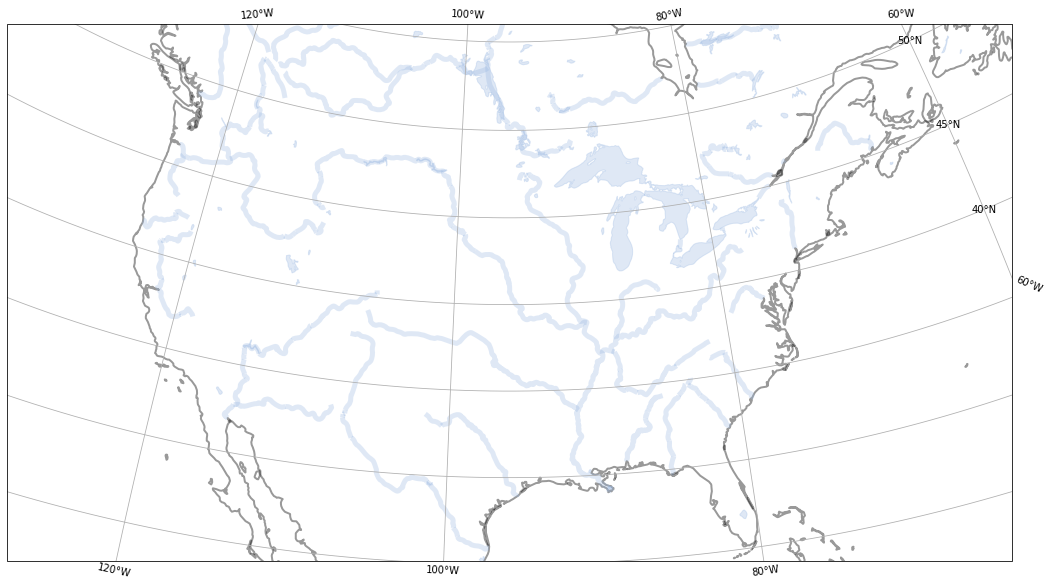

In [3]:
importlib.reload( viz )
bdict = core.get_boundary_dict( data_conus['fips'] )
bbox = gis.calculate_total_bbox( chain.from_iterable( bdict.values( )))
fig = pylab.figure( )
fig.set_size_inches([18,18])
ax = viz.create_and_draw_fromfig( fig, bbox, mult_bounds_lat=1.25)
fig.savefig( os.path.join( static_viz_dir, 'viz_create_and_draw_fromfig_conus.png'), bbox_inches = 'tight')
autocrop_image.autocrop_image( os.path.join( static_viz_dir, 'viz_create_and_draw_fromfig_conus.png') )

Demonstrate `covid19_stats.engine.viz.display_fips_geom` on the NYC Metro Area.

True

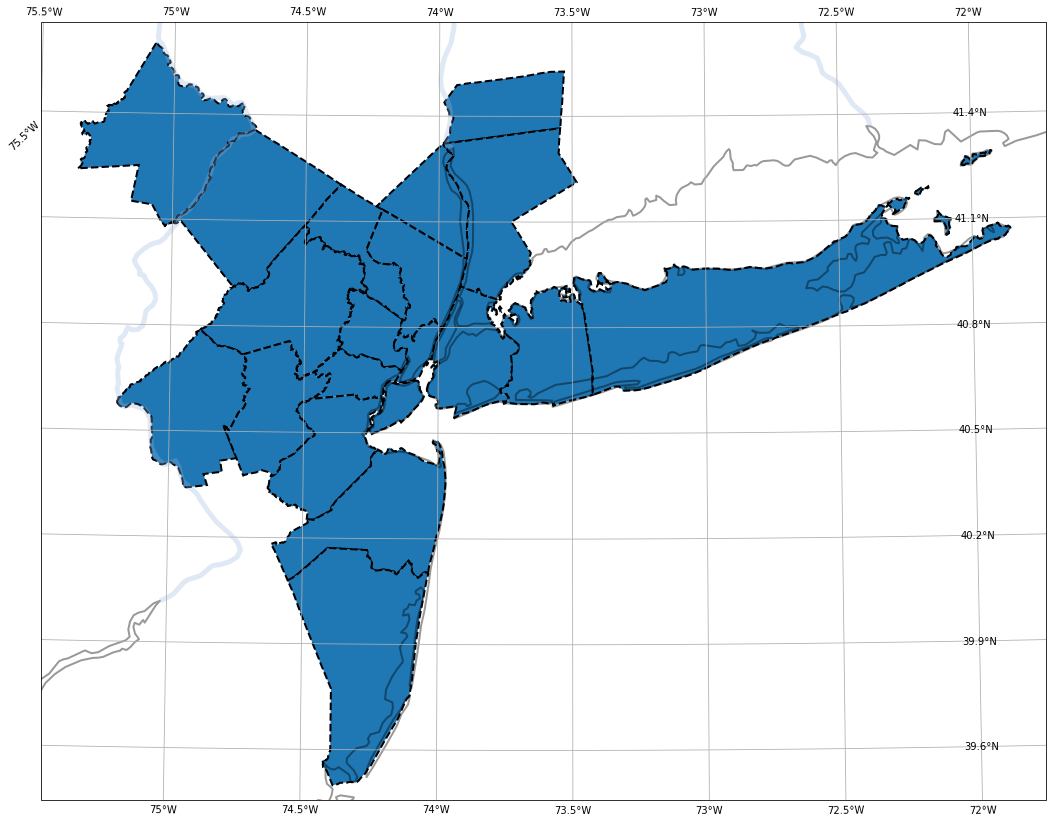

In [4]:
fig = pylab.figure( )
fig.set_size_inches([18,18])
ax = viz.display_fips_geom( core.get_msa_data( 'nyc' ), fig )
fig.savefig( os.path.join( static_viz_dir, 'viz_display_fips_geom_nyc.png'), bbox_inches = 'tight')
autocrop_image.autocrop_image( os.path.join( static_viz_dir, 'viz_display_fips_geom_nyc.png') )

Demonstrate `covid19_stats.engine.viz.display_fips` for [Rhode Island](https://en.wikipedia.org/wiki/Rhode_Island)

True

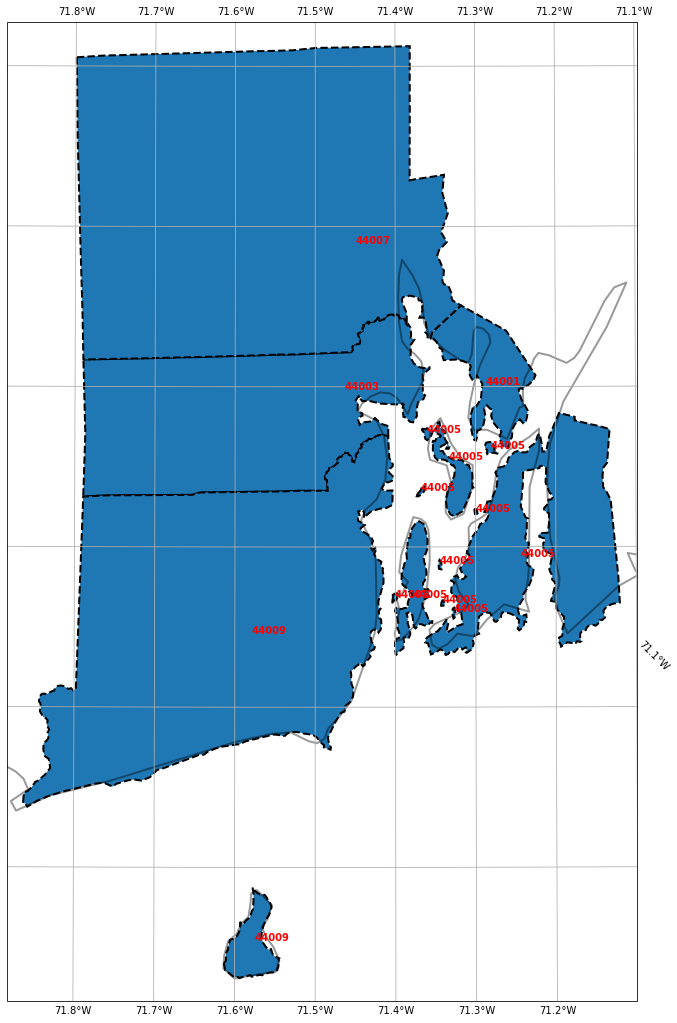

In [5]:
fig = pylab.figure( )
fig.set_size_inches([18,18])
ax = viz.display_fips( cdat.data_states()['rhode_island']['fips'], fig )
fig.savefig( os.path.join( static_viz_dir, 'viz_display_fips_rhodeisland.png'), bbox_inches = 'tight')
autocrop_image.autocrop_image( os.path.join( static_viz_dir, 'viz_display_fips_rhodeisland.png') )

Demonstrate `covid19_stats.engine.viz.display_msa` for the NYC Metro Area.

True

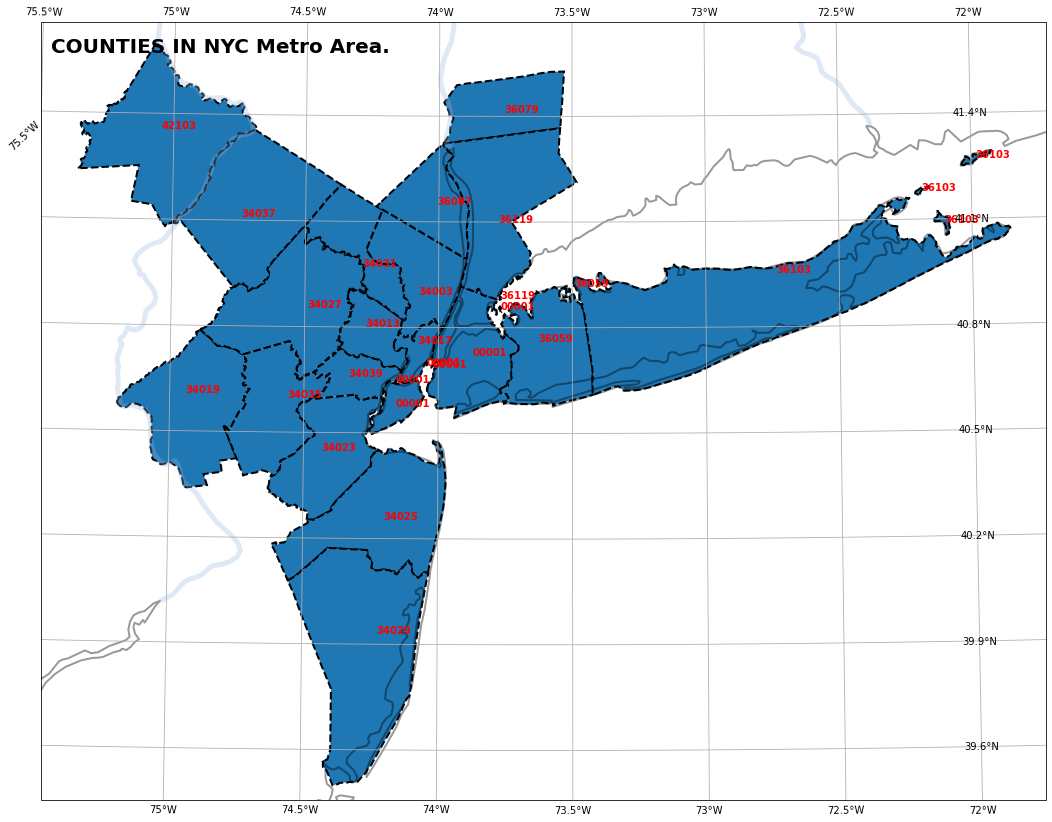

In [6]:
fig = pylab.figure( )
fig.set_size_inches([18,18])
ax = viz.display_msa( 'nyc', fig)
fig.savefig( os.path.join( static_viz_dir, 'viz_display_msa_nyc.png'), bbox_inches = 'tight')
autocrop_image.autocrop_image( os.path.join( static_viz_dir, 'viz_display_msa_nyc.png') )

Demonstrate `covid19_stats.engine.viz.plot_cases_or_deaths_bycounty` for the NYC Metro Area, 150 days after the first incident.

(1700000, 56000)

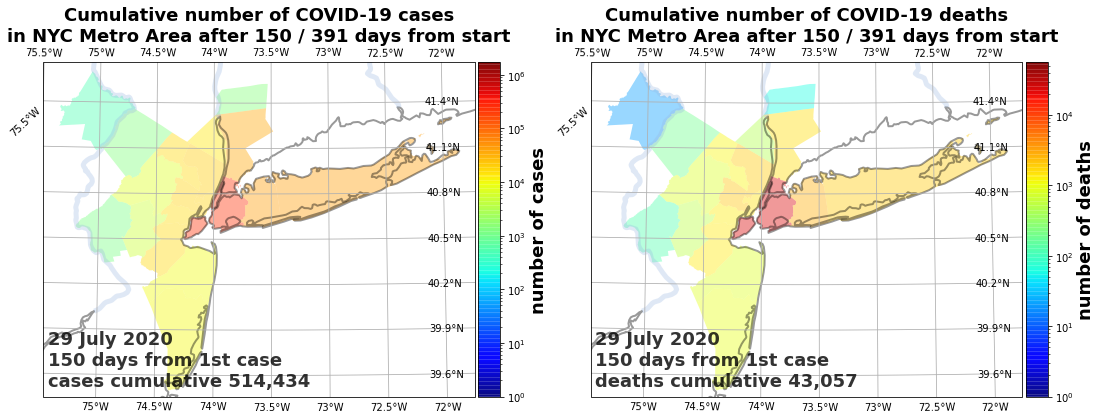

In [8]:
plot_artists_cases = { }
plot_artists_deaths = { }
fig = pylab.figure( )
fig.set_size_inches([18,12])
viz.plot_cases_or_deaths_bycounty( inc_data_nyc, inc_data_nyc[ 'region name'], fig, type_disp='cases',
                                  days_from_beginning=150,  doTitle=True,
                                  plot_artists=plot_artists_cases, rows=1, cols=2, num=1 )
viz.plot_cases_or_deaths_bycounty( inc_data_nyc, inc_data_nyc[ 'region name'], fig, type_disp='deaths',
                                  days_from_beginning=150, doTitle=True,
                                  plot_artists=plot_artists_deaths, rows=1, cols=2, num=2 )
fig.savefig( os.path.join( static_viz_dir, 'viz_plot_cases_or_deaths_bycounty_nyc.png'), bbox_inches = 'tight' )
autocrop_image.autocrop_image( os.path.join( static_viz_dir, 'viz_plot_cases_or_deaths_bycounty_nyc.png') )
maxnum_colorbar_cases, maxnum_colorbar_death

Demonstrate `covid19_stats.engine.viz.plot_cases_deaths_region` for the NYC Metro Area, 150 days after the first incident.

True

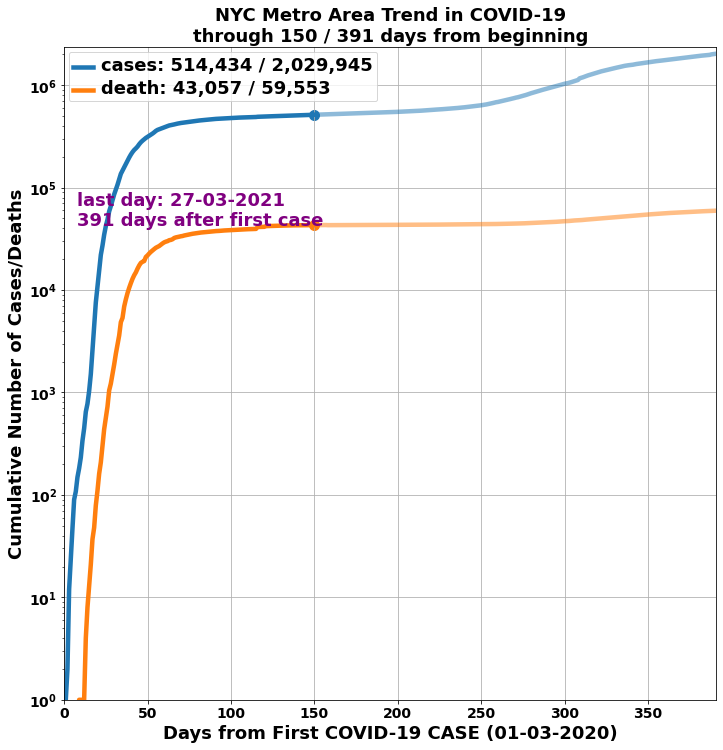

In [9]:
fig = pylab.figure( )
fig.set_size_inches([18,12])
ax = fig.add_subplot(111)
viz.plot_cases_deaths_region( inc_data_nyc, inc_data_nyc['region name'], ax, days_from_beginning=150, doTitle=True)
fig.savefig( os.path.join( static_viz_dir, 'viz_plot_cases_deaths_region_nyc.png'))
autocrop_image.autocrop_image( os.path.join( static_viz_dir, 'viz_plot_cases_deaths_region_nyc.png'))

Demonstrate `covid19_stats.engine.viz.create_plots_daysfrombeginning` for the NYC Metro Area, 150 days after the first incident. No actual visualization because it spits out to a 

In [10]:
fnames = viz.create_plots_daysfrombeginning(
    inc_data_nyc, inc_data_nyc[ 'region name' ], inc_data_nyc['prefix'], dirname = static_viz_dir,
    days_from_beginning=[ 150, ] )

In [11]:
fnames

['../docsrc/source/_static/viz/covid19_nyc_LATEST.0150.png']